<a href="https://colab.research.google.com/github/sourabhumarani/airbnb-booking/blob/main/Airbnb_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sourabhumarani/airbnb-booking/main/Airbnb%20NYC%202019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.shape

(48895, 16)

### **Getting Unique Values in the Important Columns**

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in id - 48895
Total Unique Values in name - 47906
Total Unique Values in host_id - 37457
Total Unique Values in host_name - 11453
Total Unique Values in neighbourhood_group - 5
Total Unique Values in neighbourhood - 221
Total Unique Values in latitude - 19048
Total Unique Values in longitude - 14718
Total Unique Values in room_type - 3
Total Unique Values in price - 674
Total Unique Values in minimum_nights - 109
Total Unique Values in number_of_reviews - 394
Total Unique Values in last_review - 1765
Total Unique Values in reviews_per_month - 938
Total Unique Values in calculated_host_listings_count - 47
Total Unique Values in availability_365 - 366


In [11]:
print(df.neighbourhood_group.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [12]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [13]:
df.isnull().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
df = df.dropna(subset=['host_name', 'name'])
df.isnull().sum().sort_values(ascending = False)

last_review                       10037
reviews_per_month                 10037
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
df.fillna({'reviews_per_month':0, 'last_review':0}, inplace=True)
df.isnull().sum().sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
df.drop('reviews_per_month', inplace=True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df.shape

(48858, 15)

####Now that we have cleaned dataset we can start with our Data Exploration and Analysis with Visualization

In [18]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365


But Before we start exploration, lets save the cleaned datasheet as a CSV File.

In [19]:
#saving the cleaned datasheet as csv file

df.to_csv('airbnb_new.csv')

### **Neighbourhood Group Analysis**

In [20]:
!pip install geopy
import geopy
!pip install geopandas 
import geopandas as gpd
from geopy.geocoders import Nominatim
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 16.7 MB 336 kB/s 
     |████████████████████████████████| 6.3 MB 31.1 MB/s 


In [21]:
loc = df[['neighbourhood_group','neighbourhood','latitude','longitude', 'room_type']]
loc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type
0,Brooklyn,Kensington,40.64749,-73.97237,Private room
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt
2,Manhattan,Harlem,40.80902,-73.94190,Private room
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt


In [22]:
address = 'New York City, NY'

# Getting the latitude and longitude of New York City, USA
geolocator = Nominatim(user_agent="Location_NY")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [23]:
# making lists of latitude and longitude and zipping the both for location marking
lat= loc['latitude'].tolist()
long = loc['longitude'].tolist()
locations = list(zip(lat,long)) 

#using Folium library for specifying the position of all the locations on world map with using FastMarker Cluster 
ny_map = folium.Map(location=[40.7127281, -74.0060152], zoom_start=11.5, tiles='Stamen Terrain')    #Stamen Terrain shows the terrain effect on ground.
FastMarkerCluster(data=locations).add_to(ny_map)

#Displaying map
ny_map

In [24]:
plt.rcParams['figure.figsize']=(11,8)

In [25]:
Top_Neighbourhood_Groups = df['neighbourhood_group'].value_counts().reset_index()
Top_Neighbourhood_Groups

,index,neighbourhood_group
0,Manhattan,21643
1,Brooklyn,20089
2,Queens,5664
3,Bronx,1089
4,Staten Island,373


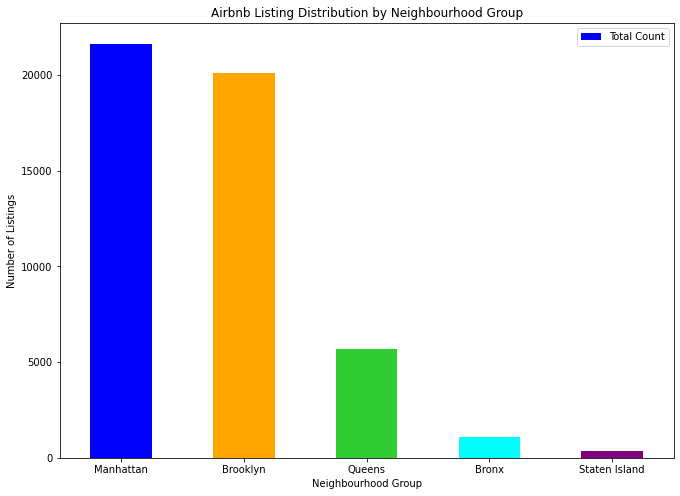

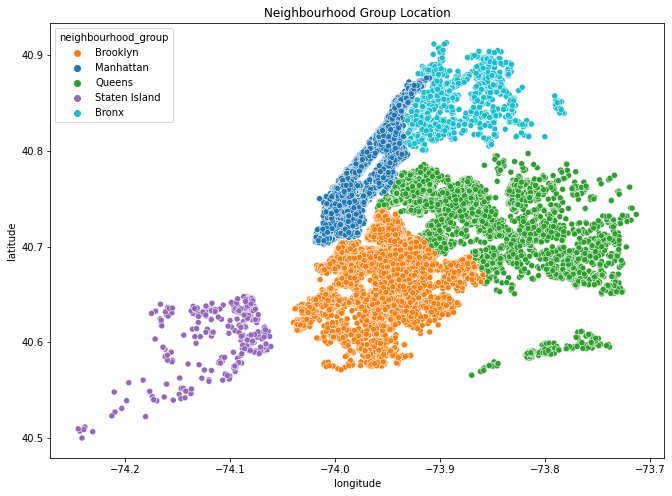

In [26]:

#changin the column names to make the graph more specific
Top_Neighbourhood_Groups.rename(columns={'index':'Neighbourhood Groups','neighbourhood_group':'Total Count'}, inplace=True)
Top_Neighbourhood_Groups

Top_Neighbourhood_Groups.plot(kind='bar', x = 'Neighbourhood Groups', y = 'Total Count', color=['Blue', 'Orange', 'limegreen', 'Cyan', 'Purple'])
plt.title("Airbnb Listing Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=0, ha='center')

print('\n')

# top_neighbourhood_groups_graph = sns.barplot(x='Neighbourhood Groups', y = 'Total Count', data = Top_Neighbourhood_Groups, palette='Blues_r')
# top_neighbourhood_groups_graph

title = 'Neighbourhood Group Location'
plt.figure(figsize=(11,8))

plt
sns.scatterplot(x=loc.longitude,y=loc.latitude,hue=loc.neighbourhood_group, palette=['tab:orange', 'tab:blue', 'tab:green', 'tab:purple', 'tab:cyan']).set_title(title)
plt.show()

In [27]:
Room_Type_Distribution =df.groupby('room_type')['id'].count()
# Room_Type_Distribution.rename(columns={'room_type':'Room Type','id':'Count Distribution'}, inplace=True)
# Top_Room_Type.rename(columns={'id':'total_count'}, inplace=True)

Room_Type_Distribution

room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


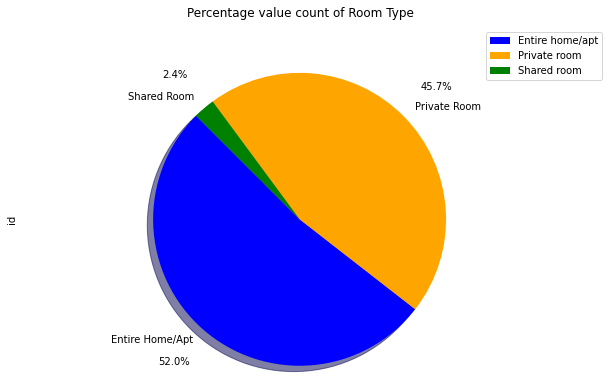

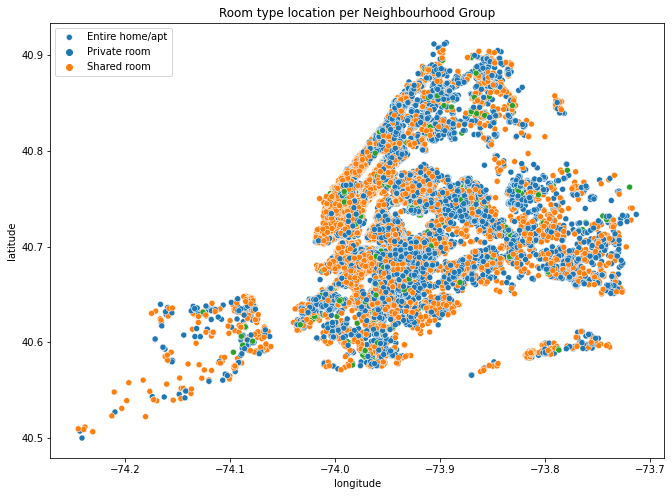

In [28]:
#visulizing the room type distribution with a pie chart

colors_list = ['blue','orange', 'green']
room_labels = ['Entire Home/Apt', 'Private Room', 'Shared Room']
explode_list = [0,0,0] # ratio for each continent with which to offset each wedge.

#Pie Plot
Room_Type_Distribution.plot(kind='pie', figsize=(10,6),
        autopct='%1.1f%%',
        startangle=135,     
        shadow=True,
        labels=room_labels,
        pctdistance=1.3,
        radius = 0.5,
        colors=colors_list, 
        explode=explode_list
        )
plt.title('Percentage value count of Room Type', y=1.1)
plt.axis('equal') 
plt.legend(labels=Room_Type_Distribution.index, bbox_to_anchor=(1.05, 1), loc='center right') 


#visualizing the room type distribution over the new york city map with a scatter plot

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(11,8))
sns.scatterplot(loc.longitude,loc.latitude,hue=loc.room_type).set_title(title)
plt.legend(labels=Room_Type_Distribution.index, loc='upper left')
plt.show()

In [29]:
# df_top_room_type = pd.DataFrame(Top_Room_Type)
# df_top_room_type.rename(columns={'id':'total_count'}, inplace=True)
# df_top_room_type

In [30]:
sns.set(rc={'figure.figsize': (10,8)})
sns.set_style('white')

In [31]:
#taking a look at minimum nights data
print(df.minimum_nights.describe())

print("\nMaximum number of Minimums nights listed -", df.minimum_nights.max())
print("Minimum number of Minimums nights listed -", df.minimum_nights.min())
print("Unique Values in minimum_nights Column -", len(df.minimum_nights.unique()))

count    48858.000000
mean         7.012444
std         20.019757
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Maximum number of Minimums nights listed - 1250
Minimum number of Minimums nights listed - 1
Unique Values in minimum_nights Column - 108


High number of listings for minimum nights between 1 to 7 and it can be seen there is high number of listings for 30 minimum nights as well. (1 month)

In [65]:
# df23 = df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
# df23 = df23.sort_values(by='room_type', ascending=True)
# df23 = df23.unstack()

# df23

# df23.plot(kind='bar', stacked=True)
# plt.title('Average Room Price in by Neighbhood Groups')
# plt.xlabel('Neighbourhood Group')
# plt.ylabel('Average Price')
# plt.xticks(rotation=0, ha='center')

# df23.plot.bar(stacked=True, title='QWERTY', color=("orange", "cyan"))

TypeError: ignored

In [66]:
df23 = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

df23.sort_values('room_type', axis=1, ascending=True)
# df23.sort_values(by='room_type', axis=1, ascending=True)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


**How much is the Average Price in each neighbourhood group for different room types?**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

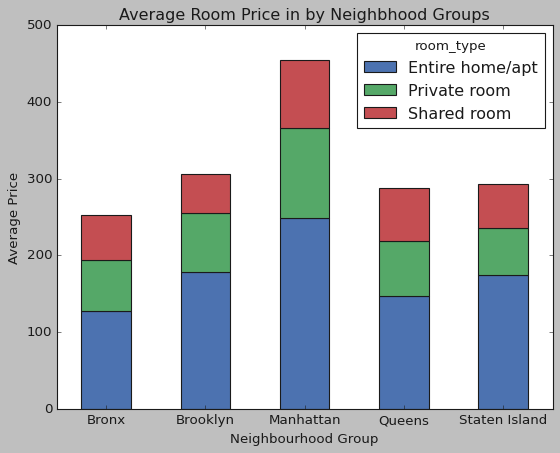

In [70]:
df23.plot(kind='bar', stacked=True)
plt.title('Average Room Price in by Neighbhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=0, ha='center')

# df23.plot.bar(stacked=True, title='QWERTY', color=("orange", "cyan", "green"))

As we can see Manhattan has the highest average price for Entire Homes followed by brookly and staten island. 

minimum_nights
1       142.062756
2       146.279374
3       160.285643
4       161.229603
5       157.263765
           ...    
400      50.000000
480     199.000000
500      88.800000
999      96.000000
1250    180.000000
Name: price, Length: 108, dtype: float64


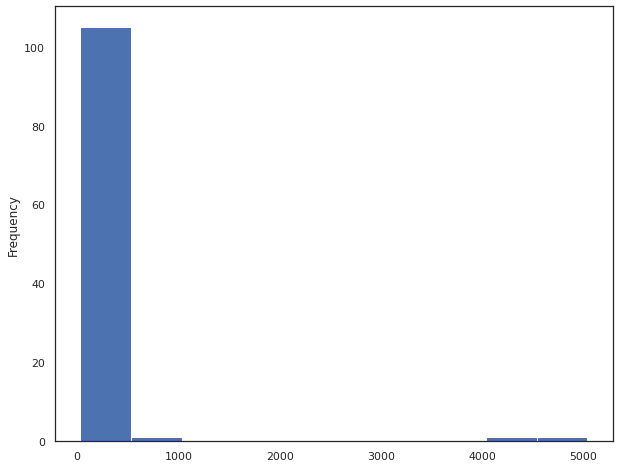

In [34]:
df5 = df.groupby('minimum_nights')['price'].mean()
print(df5)

df5.plot(kind='hist', x = 'price' , y = 'minimum_nights')

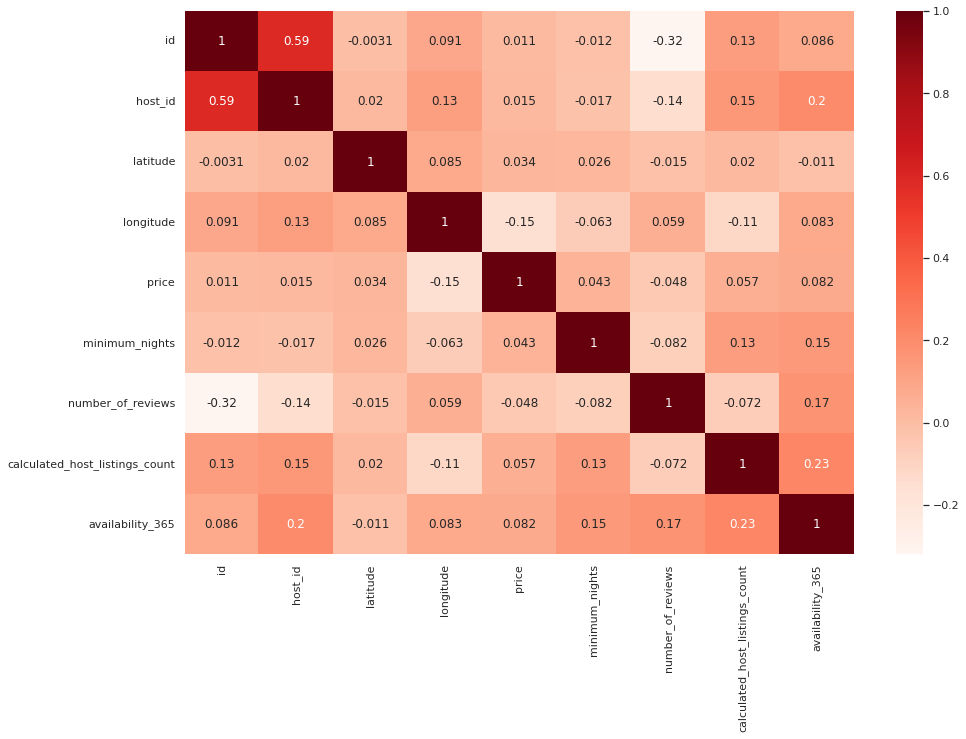

In [39]:
plt.figure(figsize=(15,10))
variable_correlation = df.corr()
heatmap=sns.heatmap(variable_correlation ,cbar=True,annot=True, cmap="Reds")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


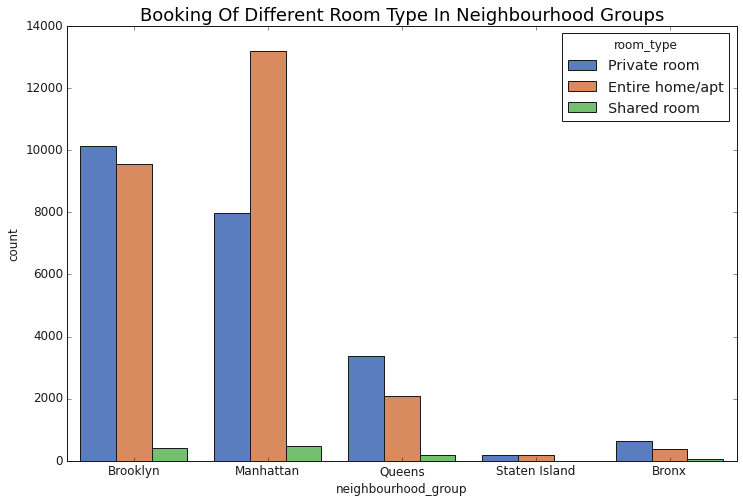

In [40]:
plt.figure(figsize=(12,8))
plt.style.use('classic')
plt.title("Booking Of Different Room Type In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

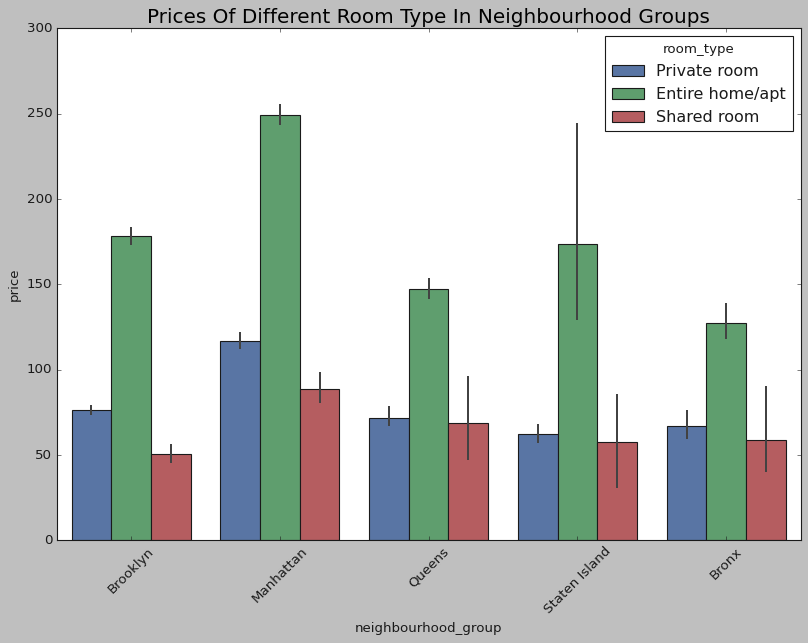

In [41]:
plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Prices Of Different Room Type In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

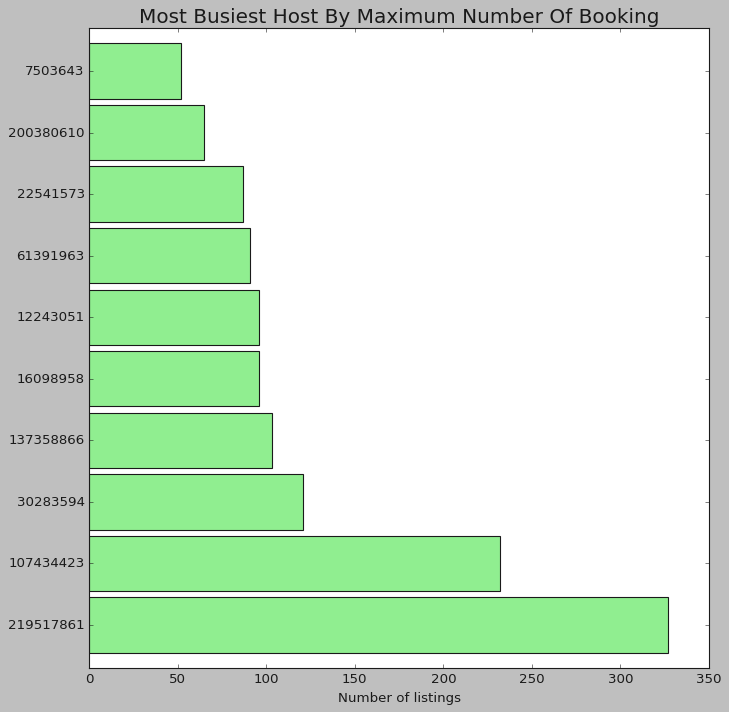

In [42]:
feq=df['host_id'].value_counts().sort_values(ascending=False)
feq[:10].plot.barh(figsize=(10, 10), color= "lightgreen", width=0.9)
plt.title("Most Busiest Host By Maximum Number Of Booking", fontsize=18)
plt.xlabel('Number of listings', fontsize=12)
plt.show()